Epoch 1/20


c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5423 - loss: 0.7942 - val_accuracy: 0.7125 - val_loss: 0.5118
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7845 - loss: 0.4746 - val_accuracy: 0.8375 - val_loss: 0.4023
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8822 - loss: 0.3577 - val_accuracy: 0.8813 - val_loss: 0.3322
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9206 - loss: 0.3177 - val_accuracy: 0.9125 - val_loss: 0.2843
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9417 - loss: 0.2251 - val_accuracy: 0.9062 - val_loss: 0.2628
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.2491 - val_accuracy: 0.9250 - val_loss: 0.2347
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1764 - val_accuracy: 0.9312 - val_loss: 0.2161
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1899 - val_accuracy: 0.9312 - val_loss: 0.2057
Ep

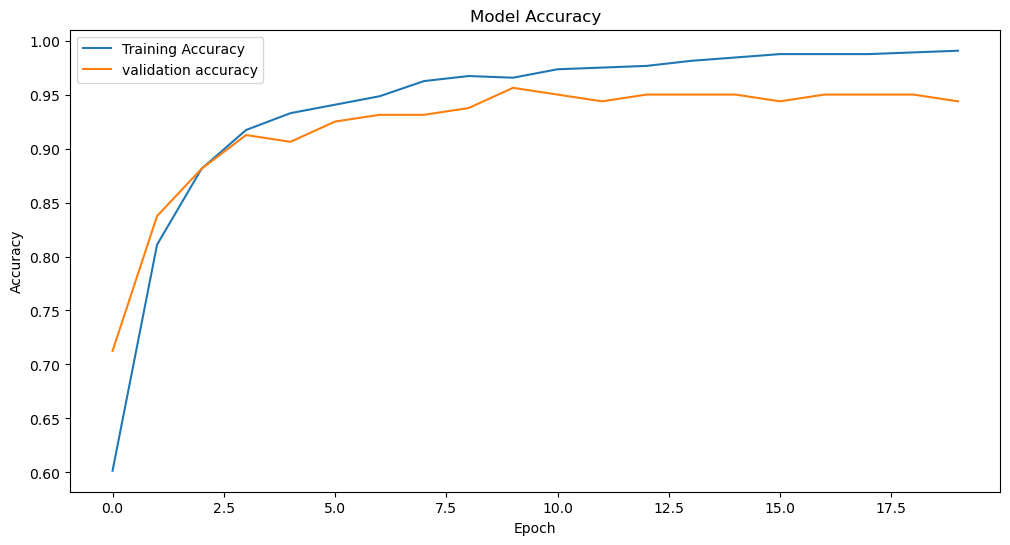

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X , y = make_classification(
    n_samples = 1000,
    n_features=20 ,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


model = Sequential([
    Dense(64 , activation='relu' , input_shape=(X_train.shape[1],)),
    Dense(32 , activation='relu' ),
    Dense(1 , activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train , y_train , 
                   epochs = 20 ,
                   batch_size=32 ,
                   validation_split = 0.2,
                   verbose = 1)

test_loss , test_accuracy = model.evaluate(X_test , y_test , verbose = 0 )
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")

# visualize the training data 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))

plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='validation accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
